#"Predicting Student Scores: How Many Hours of Study Lead to Success?"

In [ ]:
#import library
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_set = pd.read_csv("http://bit.ly/w-data")

In [ ]:
data_set

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Here, we can see two variable is in data,one is dependent variable which is scores,and another one is independent which is Hours

In [ ]:
data_set.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


let's inspect the various aspect of our dataframe

In [ ]:
data_set.shape

(25, 2)

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data_set.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#Visualising the data

let's now visualising the our data usking seaborn


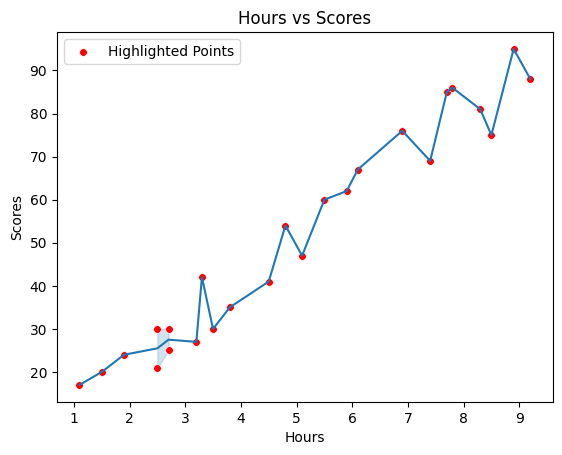

In [ ]:
sns.lineplot(data_set, x = 'Hours', y = "Scores",)
sns.scatterplot(data=data_set, x='Hours', y='Scores', color='red', label='Highlighted Points', s=30)

# Add labels and a title
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')

# Show the plot
plt.show()


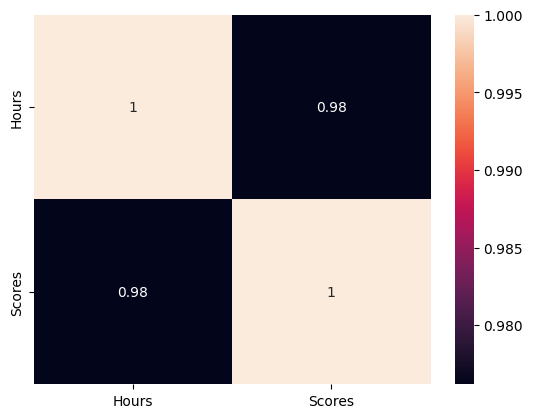

In [ ]:
sns.heatmap(data_set.corr(),annot = True)
plt.show()

perfect positive correlation of between 'Hours' and 'scpres'

#Performing simple linear regression
quation of linear regression:
Y = mX+c

Here

Y is the dependent variable (the one you want to predict or explain).

X is the independent variable (the one you use to make predictions or explain variations in Y)

m is the slope of the regression line, which represents the change in Y for a one-unit change in X.

c is the y-intercept, which represents the value of Y when X is equal to 0.

#Genric steps in model building using statsmodels

we first assgin the feature variable ,Hours in the case is X variable and response variable is Scores, to the variavle y.

In [ ]:
X = data_set["Hours"]
y = data_set["Scores"]

#Train-Test Split
we need to split our variable into training and testing data.so we have to import train_test_split from sklearn.model_selection library.it is usually a good pratice to keep 70% of the data in your dataset  and the rest 30% in your test dataset.


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.7,test_size= 0.3)

In [ ]:
X_train.head()

1     5.1
13    3.3
7     5.5
16    2.5
5     1.5
Name: Hours, dtype: float64

In [ ]:
y_train.head()

1     47
13    42
7     60
16    30
5     20
Name: Scores, dtype: int64

#Building a linear Model
you first need to import the statsmodel.api library using which you will perform the linear regression.

In [ ]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin,But in order to have intercept,i need to manually use the add_constant attributes of statsmodels and once i add the constant to X_train dataset,i can go ahead  and fit a regression line using the OLS(Ordinary Least Squres) attributes of statsmodels  as shown below

In [ ]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm).fit()

In [ ]:
lr

In [ ]:
lr.params

const    2.406696
Hours    9.919430
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     326.4
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           1.37e-11
Time:                        08:54:48   Log-Likelihood:                -51.307
No. Observations:                  17   AIC:                             106.6
Df Residuals:                      15   BIC:                             108.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4067      2.693      0.894      0.3

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#Looking at some key statistics from the summary

The values we are concerned with are

1.The coefficient and significance(p-values)

2.R-squared

3.F statistic and its significance


# The coefficent for Hours is 9.7278,with a low p value
The coefficient for "Hours" (9.7278) represents the estimated change in the

independent variable (in this case, "Scores") for a one-unit change in the

 independent variable (in this case, "Hours").

 The p-value associated with "Hours" (P>|t| = 0.000) is very close to zero. In

  statistical terms, this indicates that the relationship between "Hours" and
  
  "Scores" is statistically significant. In other words, there is strong
  
  evidence to suggest that the number of hours a student studies has a
  
  significant impact on their scores.
  

R-squred is 0.953,which means that approximately 95.3% of the variation in "Scores" is explained by the linear regression model. In other words, the model is a very good fit for the data, as a high R-squared indicates a strong relationship between the variables.



This is the p-value associated with the F-statistic. A low p-value (2.11e-11 in your case) indicates that the model is statistically significant.

#The fit is significant,let's visualize how well the model fit the data.
from the parametrs that we get,our linear regression equation becomes

Scores = 1.9544+9.7278*Hours

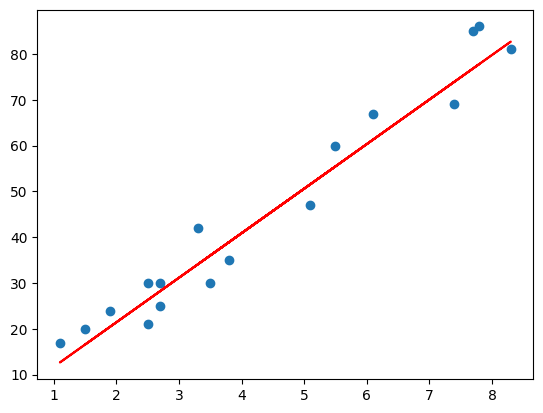

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 1.9544+9.7278*X_train,"r")
plt.show()

#Residual analysis

Distribution of the error terms
we need to check if the error terms are also normally distributed(which is infact,one of the major assumptions of linear regression),let us plot the histogram of the error terms and see what it looks like.


In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = y_train-y_train_pred

<ipython-input-21-4415ddfcb387>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins = 10)


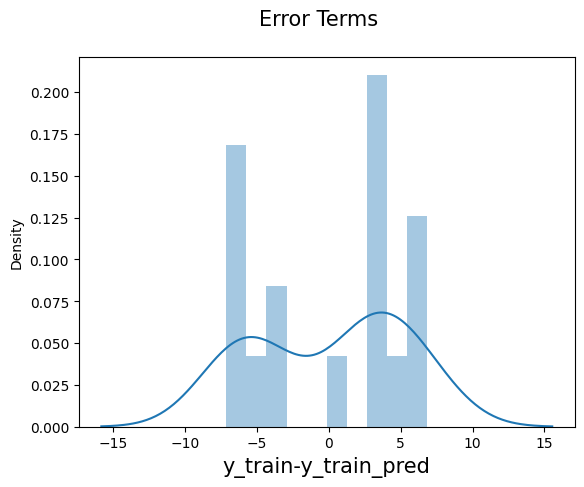

In [ ]:
fig = plt.figure()
sns.distplot(res,bins = 10)
fig.suptitle("Error Terms",fontsize = 15)
plt.xlabel("y_train-y_train_pred",fontsize = 15)
plt.show()

In [ ]:
# check on test data
y_pred = lr.predict(sm.add_constant(X_test))

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

6.316781247665329

#what will be predicted score id a student studies for 9.25 hours per day?


In [ ]:
new_data = pd.DataFrame({'Hours' : [9.25]})
lr.predict(sm.add_constant(new_data,prepend = True, has_constant = 'add'))

0    94.161424
dtype: float64

so, we got marks 94.16 at 9.25 per Hours